# Exercizes on clustering

Here you can find a program to read a data file in csv format. 

The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
    
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [35]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
    #    print("n_samples=")
    #    print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="content/"
file_path="./datasets/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print(f'Dataset 1: {data1.shape}, features: {feature_names1}')
print(f'Dataset 2: {data2.shape}, features: {feature_names2}')
print(f'Dataset 3: {data3.shape}, features: {feature_names3}')

Dataset 1: (150, 2), features: ['x' 'y']
Dataset 2: (6118, 2), features: ['x' 'y']
Dataset 3: (86558, 2), features: ['x' 'y']


The following program plots the dataset n.1

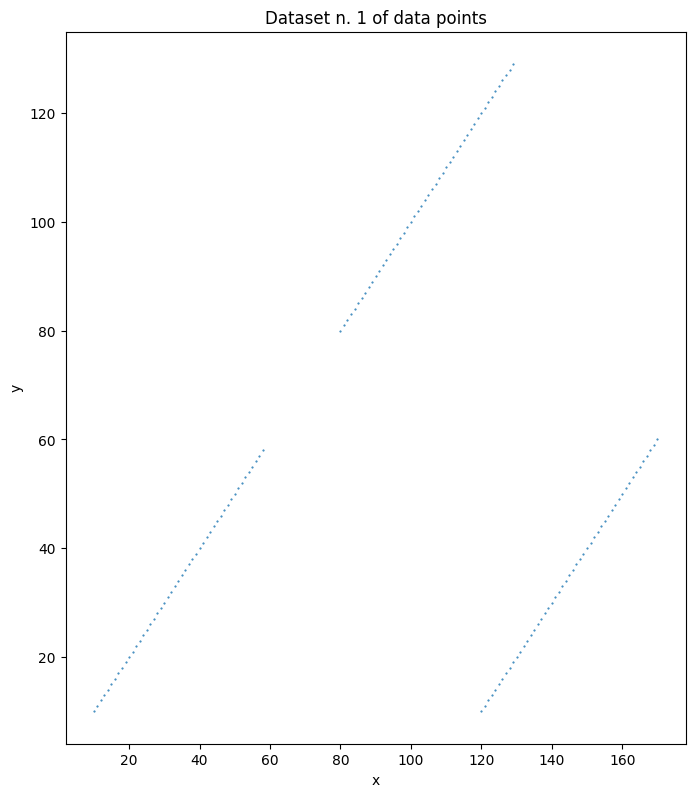

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.', markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

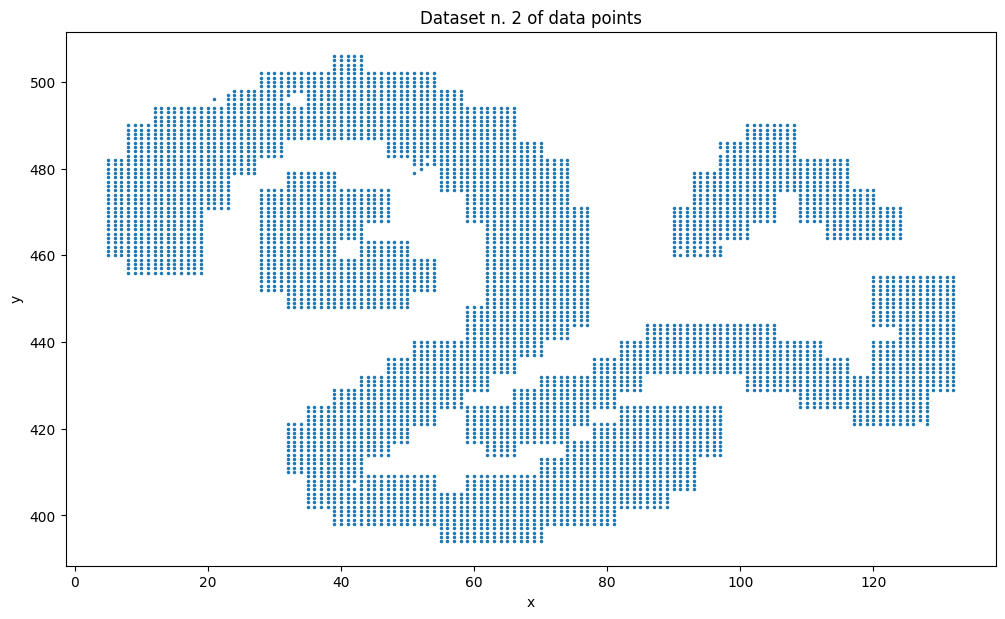

In [84]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=3)

plt.show()

The following is the program for plotting the dataset n.3

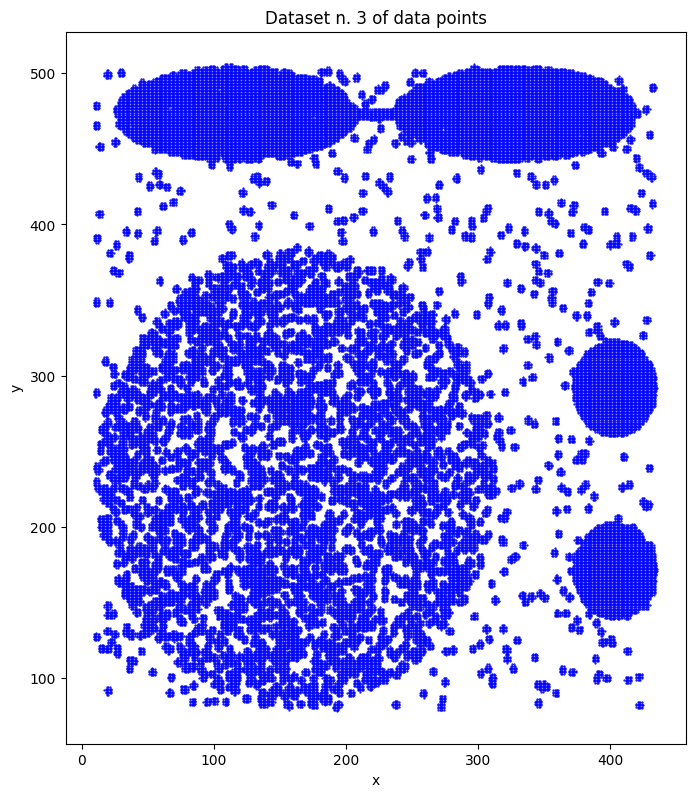

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [80]:
# collecting the data from the file number 1
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

# np.random.seed(5)

k=3
# I added the parameter init='random' to avoid the warning message and set the parameter n_init=1 to run only one initialization
kmeans1 = KMeans(n_clusters=k, random_state=0, init='random', n_init=1).fit(data1)

print('training completed for dataset 1')

training completed for dataset 1


In the following program we plot the clusters

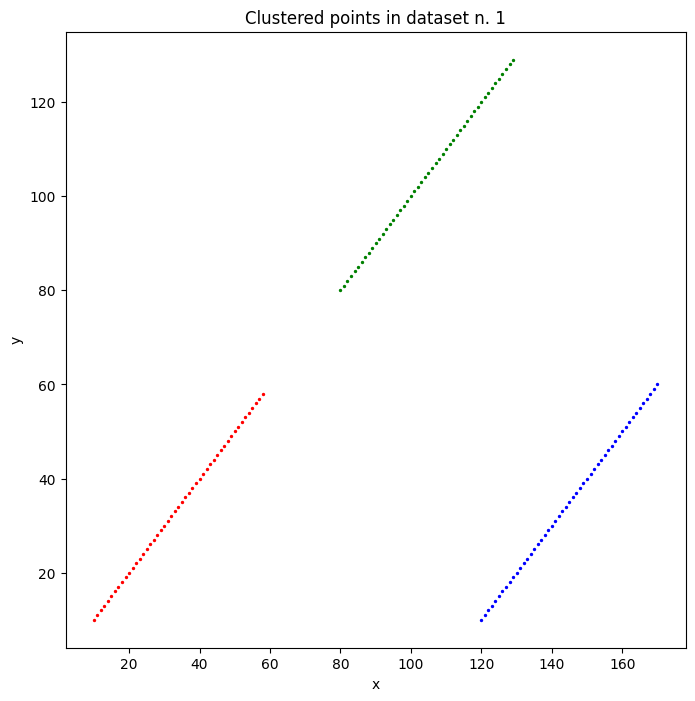

In [81]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
ax.set_title('Clustered points in dataset n. 1')
ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for cluster in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==cluster]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==cluster]
    plt.scatter(data_list_x, data_list_y, s=2, c=color[cluster], alpha=1)

plt.show()

In the following cell I propose you to perform clustering with K-means on dataset2.

In [57]:
# collecting the data from the file number 2
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)

# Use KMeans to cluster the data points in the dataset number 2
# np.random.seed(5)
# I set the number of clusters to 4, because looking at the dataset I can see that there are 4 clusters
k=4
# I added the parameter init='random' to avoid the warning message and set the parameter n_init=1 to run only one initialization
kmeans2 = KMeans(n_clusters=k, random_state=0, init='random', n_init=1).fit(data2)

print('training completed for dataset 2')

training completed for dataset 2


In the following you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

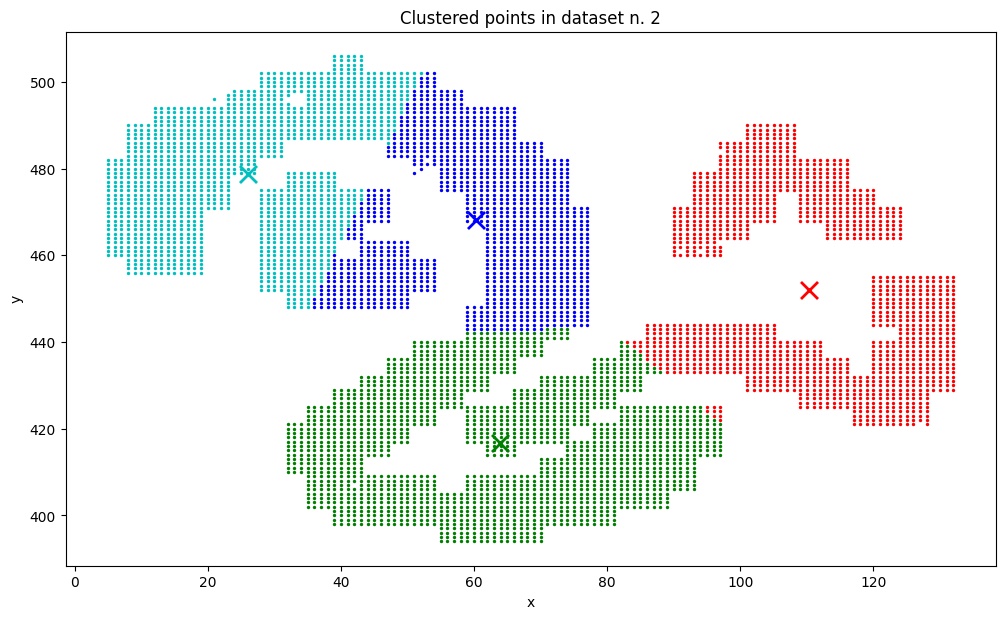

In [88]:
# plot the clustered data points
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')
ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']

# plot the dataset
for cluster in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by cluster)
    data_list_x = [data2[i,0] for i in range(n_samples2) if kmeans2.labels_[i]==cluster]
    data_list_y = [data2[i,1] for i in range(n_samples2) if kmeans2.labels_[i]==cluster]
    plt.scatter(data_list_x, data_list_y, s=2, c=color[cluster], alpha=1)
    # plot the centroid of each cluster
    plt.scatter(kmeans2.cluster_centers_[cluster,0], kmeans2.cluster_centers_[cluster,1], s=150, c=color[cluster], marker='x', linewidths=2)
plt.show()

Come si vede dal grafico sopra, K-means non è in grado di individuare i cluster corretti. Questo perchè inizializza i centroidi in maniera casuale e poi assegna i punti ai centroidi più vicini. In questo modo i punti che intuitivamente dovrebbero appartenere allo stesso cluster vengono invece assegnati semplicemente al centroide più vicino, spezzando cluster che invece dovrebbero essere uniti.

In the following cell I propose you to perform clustering with K-means on the dataset3.

In [95]:
# collecting the data from the file number 3
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)

# Use KMeans to cluster the data points in the dataset number 3
# np.random.seed(5)
# I set the number of clusters to 4, because looking at the dataset I can see that there are 4 clusters
k=4
# I added the parameter init='random' to avoid the warning message and set the parameter n_init=1 to run only one initialization
kmeans3 = KMeans(n_clusters=k, random_state=0, init='random', n_init=1).fit(data3)

print('training completed for dataset 3')

training completed for dataset 3


In the following cell, I propose you to plot clustering results on dataset3.

**Answer:** 
how do you explain what it happens?

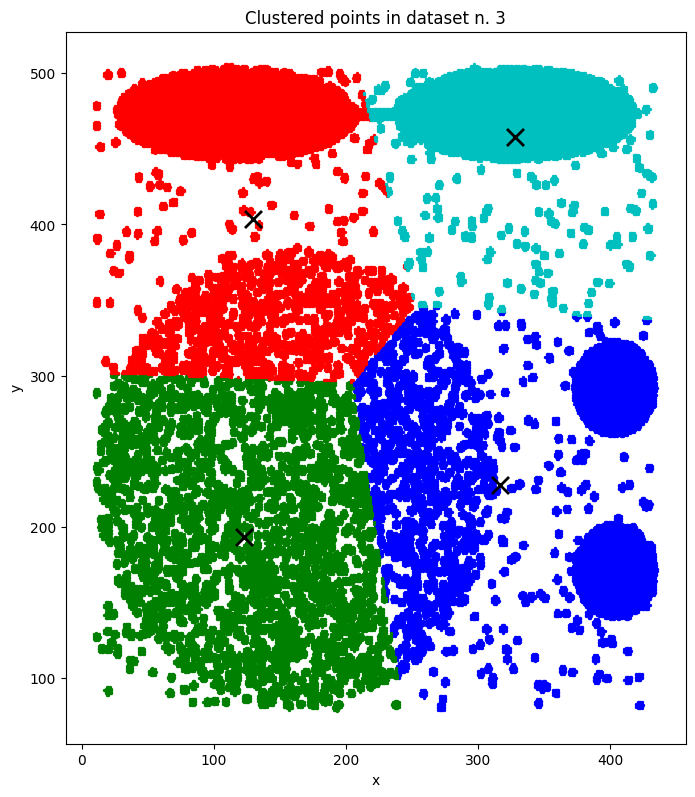

In [96]:
# plot the clustered data points
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')
ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']

# plot the dataset
for cluster in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by cluster)
    data_list_x = [data3[i,0] for i in range(n_samples3) if kmeans3.labels_[i]==cluster]
    data_list_y = [data3[i,1] for i in range(n_samples3) if kmeans3.labels_[i]==cluster]
    plt.scatter(data_list_x, data_list_y, s=2, c=color[cluster], alpha=1)
    # plot the centroid of each cluster
    plt.scatter(kmeans3.cluster_centers_[cluster,0], kmeans3.cluster_centers_[cluster,1], s=150, c='black', marker='x', linewidths=2)
plt.show()

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.